### IMPORT

In [1]:
# %matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress

In [3]:
file_mouse = os.path.join("Resources","Mouse_metadata.csv")
file_study = os.path.join("Resources","Study_results.csv")

In [4]:
df_m = pd.read_csv(file_mouse)
df_m.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
df_s = pd.read_csv(file_study)
df_s.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
print(df_s.shape,df_m.shape)

(1893, 4) (249, 5)


### CHECK and REMOVE Duplicates

In [7]:
df_s[df_s.duplicated()]
df_sd = df_s.drop_duplicates()




In [8]:
df_sd.duplicated().sum()

0

### MERGE ON MOUSE ID

In [9]:
df = pd.merge(df_m,df_sd, on ='Mouse ID')

In [10]:
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
df.shape

(1892, 8)

### Checking for Duplicate Values

In [12]:
df.duplicated().sum()

0

### Checking for null values

In [13]:
df.isnull().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [14]:
df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,12.810254,25.662262,19.582452,50.451260,1.022199
std,7.189027,3.922652,14.075984,8.896191,1.138032
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.954697,1.000000
75%,20.000000,29.000000,30.000000,56.298917,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


### Generating Summary Statistics Table

In [15]:
g_reg = df.groupby(['Drug Regimen'])

In [16]:
reg_mean = g_reg['Tumor Volume (mm3)'].mean()

In [17]:
reg_median = g_reg['Tumor Volume (mm3)'].median()

In [18]:
reg_var = g_reg['Tumor Volume (mm3)'].var()

In [19]:
reg_std = g_reg['Tumor Volume (mm3)'].std()

In [20]:
reg_sem = g_reg['Tumor Volume (mm3)'].sem()

In [21]:
summary = pd.DataFrame({"Mean (mm3)": reg_mean,"Medain (mm3)":reg_median, "Variance (mm3)": reg_var,"Std.Deviation (mm3)": reg_std,"SEM (mm3)":reg_sem})

In [22]:
summary

,Mean (mm3),Medain (mm3),Variance (mm3),Std.Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
summary2= pd.DataFrame({"Mean (mm3)": g_reg['Tumor Volume (mm3)'].mean(),"Median (mm3)": g_reg['Tumor Volume (mm3)'].median(),"Variance (mm3)":g_reg['Tumor Volume (mm3)'].var(),"Std.Deviation (mm3)":g_reg['Tumor Volume (mm3)'].std(),"SEM (mm3)":g_reg['Tumor Volume (mm3)'].sem()})


In [24]:
summary2

,Mean (mm3),Median (mm3),Variance (mm3),Std.Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Total Mice for each treatment regimen

In [25]:
axis_series = g_reg['Mouse ID'].count()
axis_series.sort_index()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [26]:
s = df['Drug Regimen'].unique()

ll = np.arange(len(axis_series))

In [27]:
s=np.sort(s)
s

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

### Using pyplot

([<matplotlib.axis.XTick at 0x240341e89b0>,
 <a list of 10 Text xticklabel objects>)

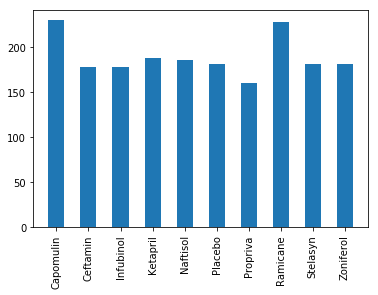

In [28]:

figure=plt.bar(ll,axis_series,width=0.5)
plt.xticks(ll,s,rotation =90)

### Using Pandas

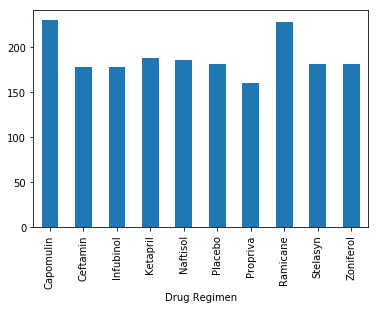

In [29]:

axis_series.plot(kind='bar',label ='Total Mice')


### Male vs Female Count using Pandas

In [30]:
grp_sex =df.groupby(['Sex']).count()

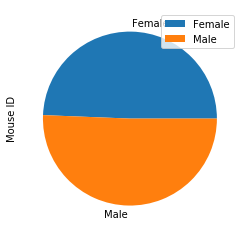

In [31]:
grp_sex.plot.pie('Mouse ID')

### Male vs Female using Matplotlib

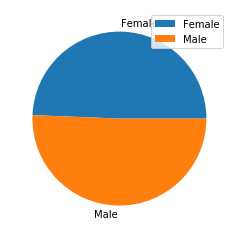

In [217]:
plt.pie(grp_sex['Mouse ID'],labels=['Female','Male'])
plt.legend()


### Final Tumor Volume

In [33]:
ids = df.groupby(['Mouse ID'])['Timepoint'].max()


In [35]:
df_int = pd.DataFrame({'Timepoint':ids})

In [36]:
df_merge=pd.merge(df,df_int,on=['Mouse ID','Timepoint'])

In [176]:
df_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [38]:
drugs=['Ramicane','Capomulin','Infubinol','Ceftamin']

In [39]:
df_drugs=df_merge[df_merge['Drug Regimen'].isin(drugs)]

In [40]:
df_drugs['Mouse ID'].nunique()

100

In [41]:
tumor_vol=[]
for ind,row in df_drugs.iterrows():
    tumor_vol.append(row['Tumor Volume (mm3)'])
    

In [139]:
df_capo1=df_drugs[df_drugs['Drug Regimen']=='Capomulin']
df_ramicine=df_drugs[df_drugs['Drug Regimen']=='Ramicane']
df_infu=df_drugs[df_drugs['Drug Regimen']=='Infubinol']
df_cefta=df_drugs[df_drugs['Drug Regimen']=='Ceftamin']

In [140]:
tvcapo=df_capo1['Tumor Volume (mm3)']
tvr=df_ramicine['Tumor Volume (mm3)']
tvi=df_infu['Tumor Volume (mm3)']
tvcefta=df_cefta['Tumor Volume (mm3)']

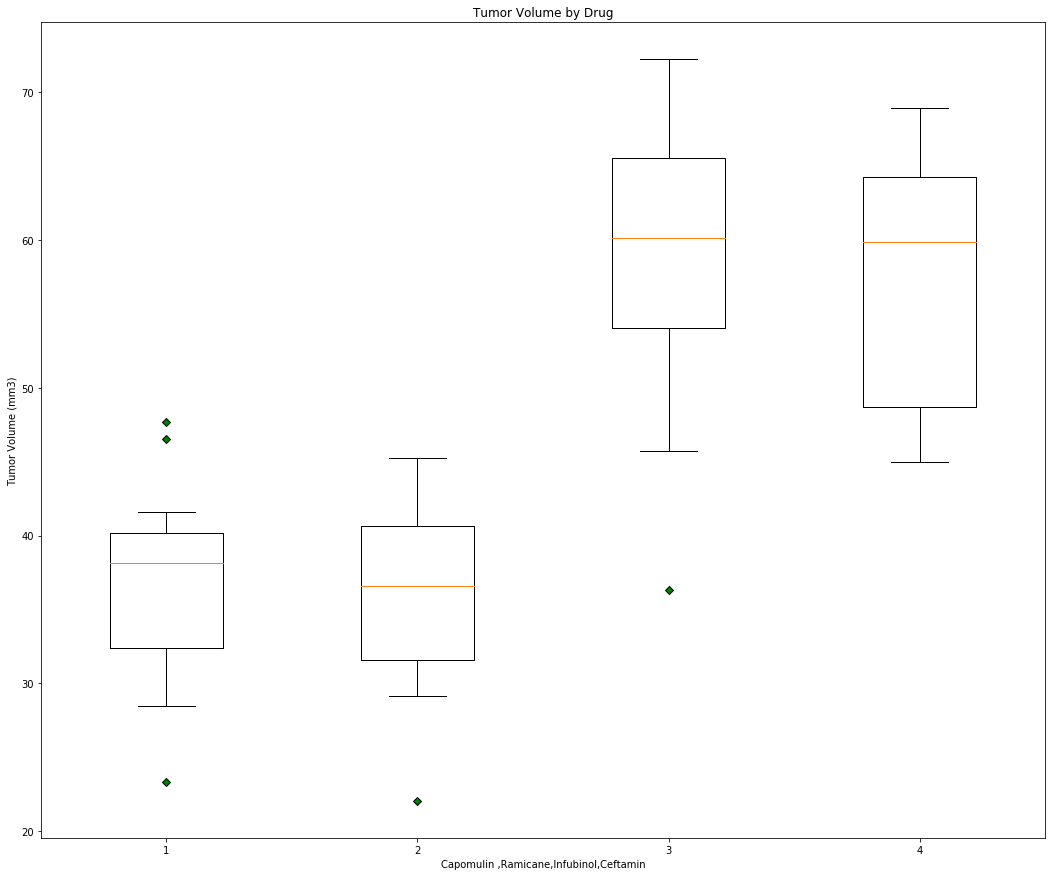

In [183]:

green_diamond=dict(markerfacecolor='g',marker='D')
data=[tvcapo,tvr,tvi,tvcefta]
x,y=plt.subplots(figsize=(18,15))
plt.xlabel('Capomulin ,Ramicane,Infubinol,Ceftamin')
plt.ylabel('Tumor Volume (mm3)')


y.set_title('Tumor Volume by Drug')
y.boxplot(data,flierprops=green_diamond,whis=0.75);


### Determining IQR 

In [173]:
a=[]
b=[]
c=[]
d=[]
db=[a,b,c,d]

In [174]:
counter=0
for s in data:
    q=s.quantile([.25,.5,.75])
    q11=q[.25]
    q33=q[.75]
    iqrr=q33-q11
    lbb=q11-(1.5*iqrr)
    ubb=q33+(1.5*iqrr)
    outt=s.loc[(s<lbb)|(s>ubb)]
    db[counter].append("outliers = {}".format(outt))
    db[counter].append("lower = {}".format(lbb))
    db[counter].append("upper = {}".format(ubb))
    db[counter].append("Total = {}".format(len(outt)))
    counter+=1
   

In [185]:
db

[['outliers = Series([], Name: Tumor Volume (mm3), dtype: float64)',
  'lower = 20.70456164999999',
  'upper = 51.83201549',
  'Total = 0'],
 ['outliers = Series([], Name: Tumor Volume (mm3), dtype: float64)',
  'lower = 17.912664470000003',
  'upper = 54.30681135',
  'Total = 0'],
 ['outliers = 74    36.321346\nName: Tumor Volume (mm3), dtype: float64',
  'lower = 36.83290494999999',
  'upper = 82.74144559000001',
  'Total = 1'],
 ['outliers = Series([], Name: Tumor Volume (mm3), dtype: float64)',
  'lower = 25.355449580000002',
  'upper = 87.66645829999999',
  'Total = 0']]

In [48]:
df_capo=df[df['Drug Regimen']=='Capomulin']

In [49]:
df_capo1mouse = df_capo[df_capo['Mouse ID']=='s185']

In [50]:
df_capo1mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [179]:
times=df_capo1mouse['Timepoint']
tumors=df_capo1mouse['Tumor Volume (mm3)']


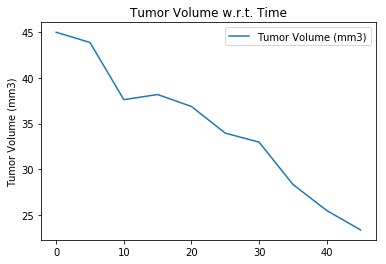

In [203]:
plt.plot(times,tumors)
plt.legend()
plt.title("Tumor Volume w.r.t. Time")
plt.ylabel("Tumor Volume (mm3)");

### Correlation and Regression

In [52]:
avg_capo = df_capo.groupby('Mouse ID')

In [53]:
mean_tumor=avg_capo['Tumor Volume (mm3)'].mean()

In [177]:
df_capo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [55]:
weight=avg_capo['Weight (g)']

In [56]:
wts=weight.unique()

In [57]:
stat_df=pd.DataFrame({"Weight":wts,"Avg_Tumor":mean_tumor})

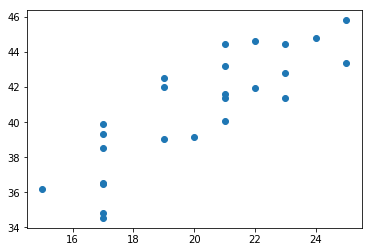

In [58]:
plt.scatter(stat_df['Weight'],stat_df['Avg_Tumor'])

In [59]:
weights = stat_df['Weight']
at=stat_df['Avg_Tumor']

In [60]:
corr = sts.pearsonr(weights,at)

In [61]:
corr

(array([0.84116671]), array([1.39298626e-07]))

In [62]:
type(weights)

pandas.core.series.Series

In [63]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(weights.astype(float),at.astype(float))

In [64]:
regress_values = weights*slope +intercept

In [65]:
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

In [66]:
line_eq

'y = 0.95x + 21.55'

Text(0, 0.5, 'Avg Tumor Vol.')

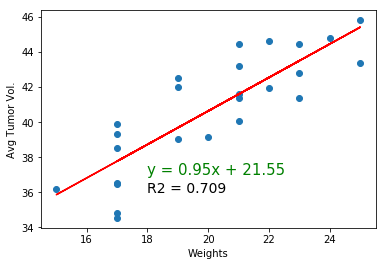

In [216]:
plt.scatter(weights,at)
plt.plot(weights,regress_values,"red")
plt.annotate(line_eq,(18,37),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(18,36),fontsize=14,color="black")
plt.xlabel('Weights')
plt.ylabel('Avg Tumor Vol.')

In [68]:
rvalue**2

0.7088568047708717